# Unsupervised Learning


The training data consists of a set of input vectors x without any corresponding target values. The goal in such problems may be to discover groups of similar examples within the data, where it is called clustering, or to determine the distribution of data within the input space, known as density estimation, or to project the data from a high-dimensional space down to two or three dimensions for the purpose of visualization# Unsupervised Learning


Many instances of unsupervised learning, such as dimensionality reduction, manifold learning and feature extraction, find a new representation of the input data without any additional input.

<img src="figures/unsupervised_workflow.svg" width="100%">

The most simple example of this, which can barely be called learning, is rescaling the data to have zero mean and unit variance. This is a helpful preprocessing step for many machine learning models.

Applying such a preprocessing has a very similar interface to the supervised learning algorithms we saw so far.
Let's load the iris dataset and rescale it:

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [7]:
from sklearn import cluster, datasets
iris = datasets.load_iris()

X, y = iris.data, iris.target
print(X.shape)

(150, 4)


The iris dataset is not "centered" that is it has non-zero mean and the standard deviation is different for each component:

In [8]:
print("mean : %s " % X.mean(axis=0))
print("standard deviation : %s " % X.std(axis=0))

mean : [ 5.84333333  3.054       3.75866667  1.19866667] 
standard deviation : [ 0.82530129  0.43214658  1.75852918  0.76061262] 


To use a preprocessing method, we first import the estimator, here StandardScaler and instantiate it:

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


As with the classification and regression algorithms, we call fit to learn the model from the data. As this is an unsupervised model, we only pass X, not y. This simply estimates mean and standard deviation.

In [10]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

Now we can rescale our data by applying the transform (not predict) method:

In [11]:
X_scaled = scaler.transform(X)

X_scaled has the same number of samples and features, but the mean was subtracted and all features were scaled to have unit standard deviation:

In [12]:
print(X_scaled.shape)

(150, 4)


In [13]:
print("mean : %s " % X_scaled.mean(axis=0))
print("standard deviation : %s " % X_scaled.std(axis=0))

mean : [ -1.69031455e-15  -1.63702385e-15  -1.48251781e-15  -1.62314606e-15] 
standard deviation : [ 1.  1.  1.  1.] 


Principal Component Analysis
============================

An unsupervised transformation that is somewhat more interesting is Principle Component Analysis (PCA).
It is a technique to reduce the dimensionality of the data, by creating a linear projection.
That is, we find new features to represent the data that are a linear combination of the old data (i.e. we rotate it).

The way PCA finds these new directions is by looking for the directions of maximum variance.
Usually only few components that explain most of the variance in the data are kept. To illustrate how a rotation might look like, we first show it on two dimensional data and keep both principal components.

We create a Gaussian blob that is rotated:

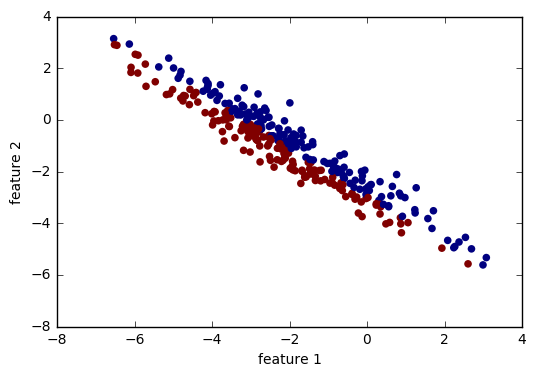

In [14]:
#Mersenne Twister pseudo-random number generator.
rnd = np.random.RandomState(5)


# Draw random samples from a normal (Gaussian) distribution. Here a 300 *2 samples are drawn
X_ = rnd.normal(size=(300, 2)) 

# np.dot: Dot product of two arrays
X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)#Dot product of two arrays.

# matrix of True or False
y = X_[:, 0] > 0 
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y, linewidths=0, s=30)
plt.xlabel("feature 1")
plt.ylabel("feature 2")

In [15]:
X_[1:10,0]

array([ 2.43077119,  0.10960984, -0.9092324 ,  0.18760323, -1.19276461,
       -0.35882895, -1.66478853,  1.15139101, -1.51117956])

As always, we instantiate our PCA model. By default all directions are kept.

In [16]:
from sklearn.decomposition import PCA
pca = PCA()

Then we fit the PCA model with our data. As PCA is an unsupervised algorithm, there is no output ``y``.

In [17]:
pca.fit(X_blob)

PCA(copy=True, n_components=None, whiten=False)

Then we can transform the data, projected on the principal components:

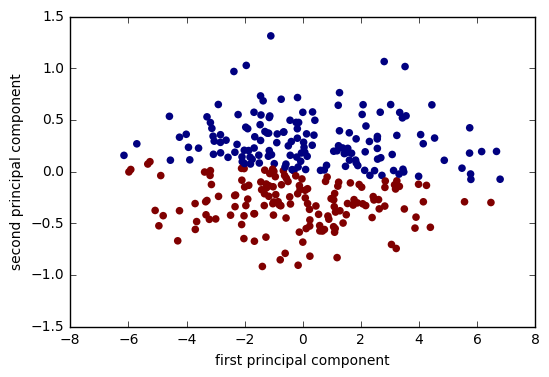

In [18]:
X_pca = pca.transform(X_blob)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, linewidths=0, s=30)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

On the left of the plot you can see the four points that were on the top right before. PCA found fit first component to be along the diagonal, and the second to be perpendicular to it. As PCA finds a rotation, the principal components are always at right angles to each other.

Dimensionality Reduction for Visualization with PCA
-------------------------------------------------------------
Consider the digits dataset. It cannot be visualized in a single 2D plot, as it has 64 features. We are going to extract 2 dimensions to visualize it in, using the example from the sklearn examples [here](http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html)

Note that this projection was determined *without* any information about the
labels (represented by the colors): this is the sense in which the learning
is **unsupervised**.  Nevertheless, we see that the projection gives us insight
into the distribution of the different digits in parameter space.

## Manifold Learning

One weakness of PCA is that it cannot detect non-linear features.  A set
of algorithms known as *Manifold Learning* have been developed to address
this deficiency.  A canonical dataset used in Manifold learning is the
*S-curve*, which we briefly saw in an earlier section:

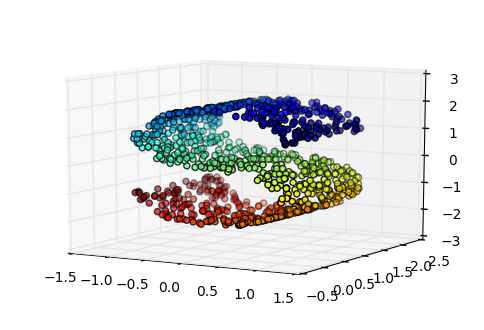

In [19]:
from sklearn.datasets import make_s_curve
X, y = make_s_curve(n_samples=1000)

from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.view_init(10, -60)

This is a 2-dimensional dataset embedded in three dimensions, but it is embedded
in such a way that PCA cannot discover the underlying data orientation:

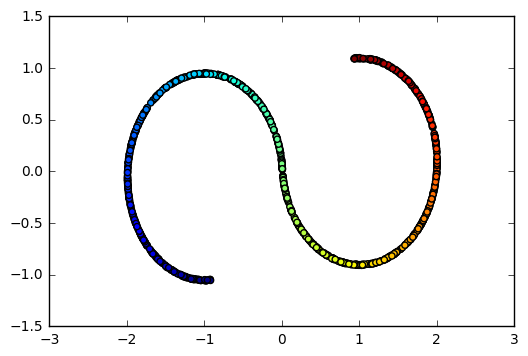

In [20]:
X_pca = PCA(n_components=2).fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

Manifold learning algorithms, however, available in the ``sklearn.manifold``
submodule, are able to recover the underlying 2-dimensional manifold:

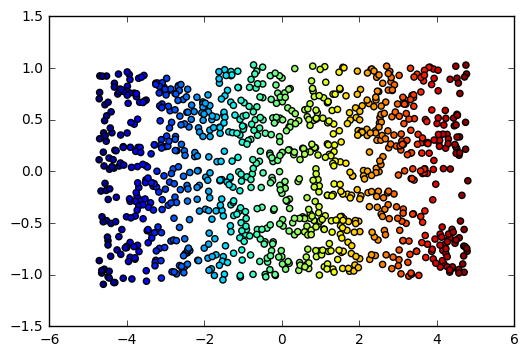

In [21]:
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=15, n_components=2)
X_iso = iso.fit_transform(X)
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y)

**Exercise 6

Compare the results of Isomap and  PCA on a 5-class subset of the digits dataset (``load_digits(5)``).

__Bonus__: Also compare to TSNE, another popular manifold learning technique.

# Clustering

Clustering is the task of gathering samples into groups of similar
samples according to some predefined similarity or dissimilarity
measure (such as the Euclidean distance).
In this section we will explore a basic clustering task on some synthetic and real datasets.

Here are some common applications of clustering algorithms:

- Compression, in a data reduction sense
- Can be used as a preprocessing step for recommender systems
- Similarly:
   - grouping related web news (e.g. Google News) and web search results
   - grouping related stock quotes for investment portfolio management
   - building customer profiles for market analysis
- Building a code book of prototype samples for unsupervised feature extraction



Let's start of with a very simple and obvious example:

In [22]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
X.shape

(100, 2)

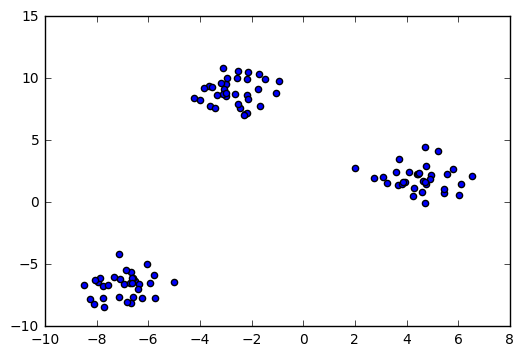

In [23]:
plt.scatter(X[:, 0], X[:, 1])

There are clearly three separate groups of points in the data, and we would like to recover them using clustering.
Even if the groups are obvious in the data, it is hard to find them when the data lives in a high-dimensional space.

Now we will use one of the simplest clustering algorithms, K-means.
This is an iterative algorithm which searches for three cluster
centers such that the distance from each point to its cluster is
minimized.
**Question:** what would you expect the output to look like?

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

We can get the cluster labels either by calling fit and then accessing the 
``labels_`` attribute of the K means estimator, or by calling ``fit_predict``.
Either way, the result contains the ID of the cluster that each point is assigned to.

In [25]:
labels = kmeans.fit_predict(X)

In [26]:
labels

array([1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 0, 2, 2, 2, 0, 1, 2], dtype=int32)

In [27]:
all(labels == kmeans.labels_)

True

Let's visualize the assignments that have been found

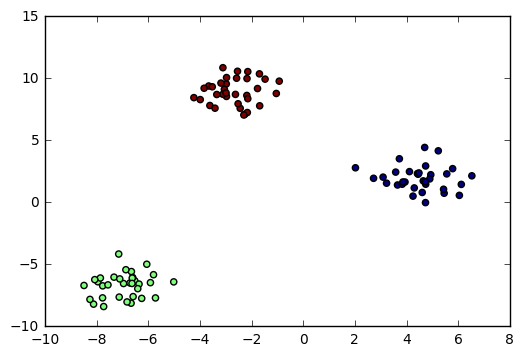

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=labels)

Here, we are probably satisfied with the clustering. But in general we might want to have a more quantitative evaluation. How about we compare our cluster labels with the ground truth we got when generating the blobs?

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y, labels))
print(confusion_matrix(y, labels))

0.0
[[ 0  0 34]
 [33  0  0]
 [ 0 33  0]]


In [30]:
np.mean(y == labels)

0.0

Even though we recovered the partitioning of the data into clusters perfectly, the cluster IDs we assigned were arbitrary,
and we can not hope to recover them. Therefore, we must use a different scoring metric, such as ``adjusted_rand_score``, which is invariant to permutations of the labels:

In [31]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y, labels)

1.0

**Clustering comes with assumptions**: A clustering algorithm finds clusters by making assumptions with samples should be grouped together. Each algorithm makes different assumptions and the quality and interpretability of your results will depend on whether the assumptions are satisfied for your goal. For K-means clustering, the model is that all clusters have equal, spherical variance.

**In general, there is no guarantee that structure found by a clustering algorithm has anything to do with what you were interested in**.

We can easily create a dataset that has non-isotropic clusters, on which kmeans will fail:

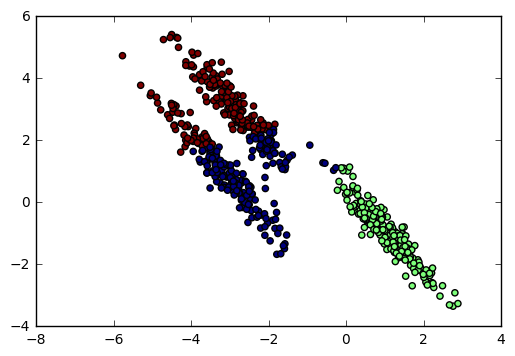

In [32]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

y_pred = KMeans(n_clusters=3).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)

## Some Notable Clustering Routines

The following are two well-known clustering algorithms. 

- `sklearn.cluster.KMeans`: <br/>
    The simplest, yet effective clustering algorithm. Needs to be provided with the
    number of clusters in advance, and assumes that the data is normalized as input
    (but use a PCA model as preprocessor).
- `sklearn.cluster.MeanShift`: <br/>
    Can find better looking clusters than KMeans but is not scalable to high number of samples.
- `sklearn.cluster.DBSCAN`: <br/>
    Can detect irregularly shaped clusters based on density, i.e. sparse regions in
    the input space are likely to become inter-cluster boundaries. Can also detect
    outliers (samples that are not part of a cluster).
- `sklearn.cluster.AffinityPropagation`: <br/>
    Clustering algorithm based on message passing between data points.
- `sklearn.cluster.SpectralClustering`: <br/>
    KMeans applied to a projection of the normalized graph Laplacian: finds
    normalized graph cuts if the affinity matrix is interpreted as an adjacency matrix of a graph.
- `sklearn.cluster.Ward`: <br/>
    Ward implements hierarchical clustering based on the Ward algorithm,
    a variance-minimizing approach. At each step, it minimizes the sum of
    squared differences within all clusters (inertia criterion).

Of these, Ward, SpectralClustering, DBSCAN and Affinity propagation can also work with precomputed similarity matrices.

<img src="figures/cluster_comparison.png" width="900">

## Exercise: digits clustering

Perform K-means clustering on the digits data, searching for ten clusters.
Visualize the cluster centers as images (i.e. reshape each to 8x8 and use
``plt.imshow``)  Do the clusters seem to be correlated with particular digits? What is the ``adjusted_rand_score``?

Visualize the projected digits as in the last notebook, but this time use the
cluster labels as the color.  What do you notice?

In [33]:
from sklearn.datasets import load_digits
digits = load_digits()

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(digits.data)

In [35]:
print(kmeans.cluster_centers_.shape)

(10, 64)


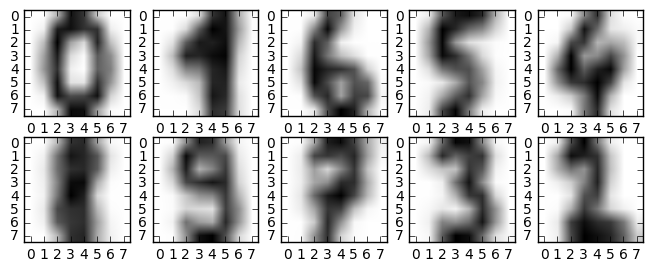

In [36]:
#------------------------------------------------------------
# visualize the cluster centers
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i)
    ax.imshow(kmeans.cluster_centers_[i].reshape((8, 8)),
              cmap=plt.cm.binary)
from sklearn.manifold import Isomap
X_iso = Isomap(n_neighbors=10).fit_transform(digits.data)


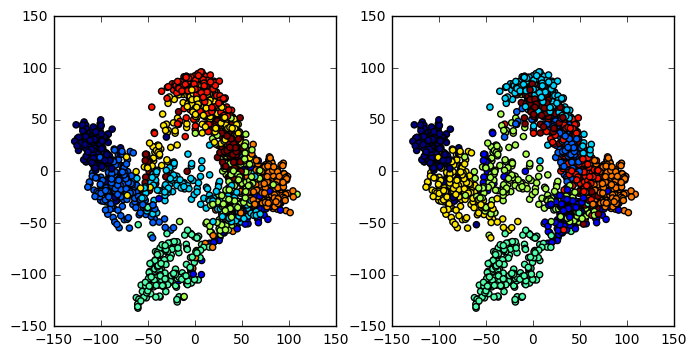

In [37]:
#------------------------------------------------------------
# visualize the projected data
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=digits.target)
